# Step 1: Import Libraries

In [1]:
import re
import string
import scipy
import pickle
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from astropy.table import Table , Column
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Step 2: Read, Understand and Pre-process Train/Test Data

# Step 2.1: Read Data

In [2]:
data = pd.read_csv('heart.csv') 
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
data.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

<AxesSubplot:ylabel='Frequency'>

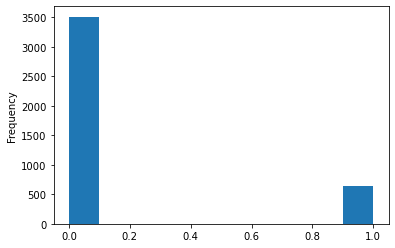

In [5]:
data.TenYearCHD.plot(kind='hist' , grid = False)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


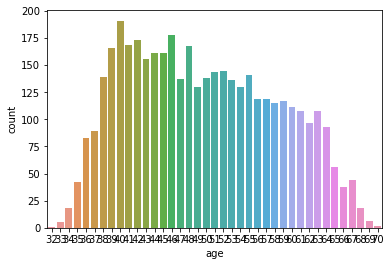

In [6]:
sns.countplot(data.age)
plt.show()

<AxesSubplot:ylabel='age'>

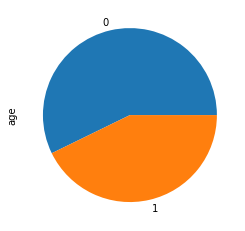

In [7]:
data.groupby('male').age.count().plot(kind='pie')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

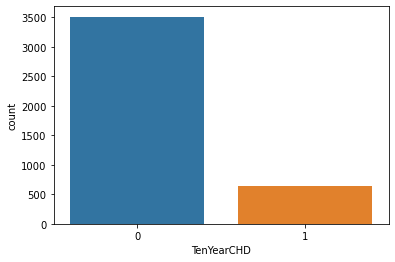

In [9]:
sns.countplot(data.TenYearCHD)

<AxesSubplot:ylabel='male'>

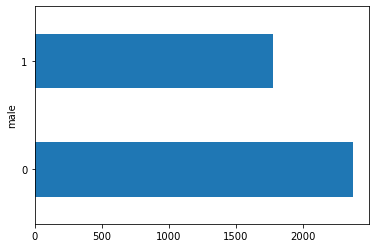

In [10]:
data.groupby('male').TenYearCHD.count().plot(kind='barh')

<AxesSubplot:>

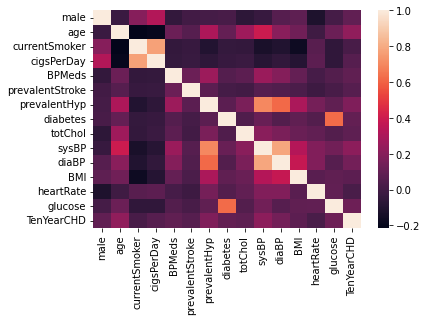

In [12]:
sns.heatmap(data.corr(),annot=False)

<AxesSubplot:xlabel='age'>

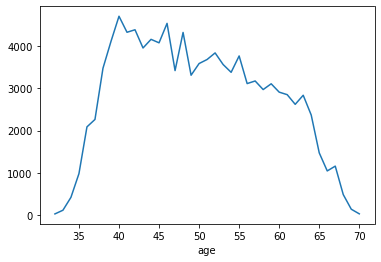

In [13]:
data.groupby('age').BMI.sum().plot(kind='line')

<AxesSubplot:xlabel='age'>

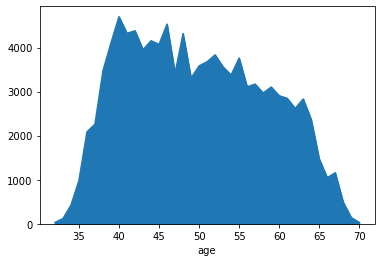

In [14]:
data.groupby('age').BMI.sum().plot(kind='area')

# Step 2.2: Understand Data

In [5]:
data.columns.name="index"
print("Train Dataset:")
print(data)

Train Dataset:
index  male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   
...     ...  ...            ...         ...     ...              ...   
4147      1   50              1         1.0     0.0                0   
4148      1   51              1        43.0     0.0                0   
4149      0   48              1        20.0     NaN                0   
4150      0   44              1        15.0     0.0                0   
4151      0   52              0         0.0     0.0                0   

index  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                 0         0    195.0  106.0 

In [6]:
print("Train Data Set Columns:")
trainDatadf=pd.DataFrame(data)
trainDataIndex=trainDatadf.columns
print(trainDataIndex)

print("\n")
print("Number of instances in Train Dataset")
print("Train Instances: %s"% (len(trainDatadf.index)))

Train Data Set Columns:
Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object', name='index')


Number of instances in Train Dataset
Train Instances: 4152


In [7]:
trainDataIndex

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object', name='index')

In [8]:
trainDatadf

index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4148,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4149,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4150,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [9]:
data.describe()

index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4152.000000,4152.000000,4152.000000,4123.000000,4101.000000,4152.000000,4152.000000,4152.000000,4103.000000,4152.000000,4152.000000,4133.000000,4151.000000,3768.000000,4152.000000
mean,0.427746,49.597303,0.495424,9.016493,0.029505,0.006021,0.311657,0.025530,236.859371,132.424374,82.915703,25.803760,75.917369,82.020966,0.155106
std,0.494811,8.582176,0.500039,11.934388,0.169238,0.077372,0.463226,0.157747,44.668954,22.063102,11.920569,4.080893,12.042221,24.104351,0.362049
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152 entries, 0 to 4151
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4152 non-null   int64  
 1   age              4152 non-null   int64  
 2   currentSmoker    4152 non-null   int64  
 3   cigsPerDay       4123 non-null   float64
 4   BPMeds           4101 non-null   float64
 5   prevalentStroke  4152 non-null   int64  
 6   prevalentHyp     4152 non-null   int64  
 7   diabetes         4152 non-null   int64  
 8   totChol          4103 non-null   float64
 9   sysBP            4152 non-null   float64
 10  diaBP            4152 non-null   float64
 11  BMI              4133 non-null   float64
 12  heartRate        4151 non-null   float64
 13  glucose          3768 non-null   float64
 14  TenYearCHD       4152 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 486.7 KB


In [11]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4147    False
4148    False
4149    False
4150    False
4151    False
Length: 4152, dtype: bool

In [12]:
q=data.drop_duplicates()

<AxesSubplot:>

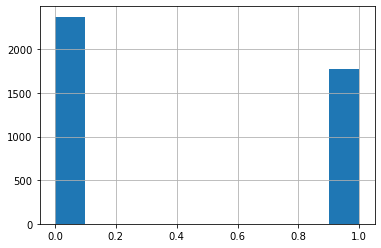

In [14]:
data.male.hist()



# pre process data


In [3]:
preprocessed_dataset = data.fillna('0')

print("Train dataset before pre-processing:")
print("=========================================\n")
print(data)

print("\n\n\nTrain dataset after pre-processing:")
print("=========================================\n")
print(preprocessed_dataset)

Train dataset before pre-processing:

      male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4147     1   50              1         1.0     0.0                0   
4148     1   51              1        43.0     0.0                0   
4149     0   48              1        20.0     NaN                0   
4150     0   44              1        15.0     0.0                0   
4151     0   52              0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.

In [4]:
preprocessed_dataset.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.1,85.0,85.0,0



#   no need for Label Encoding for Train/Test Data

# Train ML Algorithms using Data

In [5]:
x=preprocessed_dataset.iloc[:, :-1].values
y=preprocessed_dataset.iloc[:, -1:].values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Train ML Algorithms using Logistic Regression

In [7]:
logisticRegression=LogisticRegression()
logisticRegression.fit(x_train,y_train)
LR = logisticRegression.predict(x_test)
accuracy_score(y_test, LR)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.851985559566787

## Evaluate ML Algorithms using Test Data

In [11]:
 accuracy_score=accuracy_score(y_test, LR)
 print("\n accuracy_score is: %s"%accuracy_score)
 recall_score=recall_score(y_test, LR)
 print("\n recall_score is: %s"%recall_score)
 precision_score=precision_score(y_test, LR)
 print("\n precision_score is: %s"%precision_score)
 f1_score=f1_score(y_test, LR)
 print("\n f1_score is: %s"%f1_score)


 accuracy_score is: 0.851985559566787

 recall_score is: 0.04032258064516129

 precision_score is: 0.5555555555555556

 f1_score is: 0.07518796992481203


# Train ML Algorithms using Random Forest Classifier

In [8]:
randomForest=RandomForestClassifier()
randomForest.fit(x_train,y_train)
RF = randomForest.predict(x_test)
accuracy_score(y_test, RF)

C:\Users\DELL\AppData\Local\Temp/ipykernel_12624/3108075893.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(x_train,y_train)


0.855595667870036

## Evaluate ML Algorithms using Test Data

In [12]:
 accuracy_score=accuracy_score(y_test, RF)
 print("\n accuracy_score is: %s"%accuracy_score)
 recall_score=recall_score(y_test, RF)
 print("\n recall_score is: %s"%recall_score)
 precision_score=precision_score(y_test, RF)
 print("\n precision_score is: %s"%precision_score)
 f1_score=f1_score(y_test, RF)
print("\n f1_score is: %s"%f1_score)

TypeError: 'numpy.float64' object is not callable

# Train ML Algorithms using linearSvc


In [9]:
linearSvc=LinearSVC()
linearSvc.fit(x_train,y_train)
LS = linearSvc.predict(x_test)
accuracy_score(y_test, LS)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8495788206979543

 ## Evaluate ML Algorithms using Test Data

In [ ]:
# accuracy_score=accuracy_score(y_test, LS)
# print("\n accuracy_score is: %s"%accuracy_score)
# recall_score=recall_score(y_test, LS)
# print("\n recall_score is: %s"%recall_score)
# precision_score=precision_score(y_test, LS)
# print("\n precision_score is: %s"%precision_score)
# f1_score=f1_score(y_test, LS)
# print("\n f1_score is: %s"%f1_score)

# Train ML Algorithms using BernoulliNB


In [10]:
bernoulliNB=BernoulliNB()
bernoulliNB.fit(x_train,y_train)
NB = bernoulliNB.predict(x_test)
accuracy_score(y_test, NB)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8471720818291215

## Evaluate ML Algorithms using Test Data

In [ ]:
# accuracy_score=accuracy_score(y_test, NB)
# print("\n accuracy_score is: %s"%accuracy_score)
# recall_score=recall_score(y_test, NB)
# print("\n recall_score is: %s"%recall_score)
# precision_score=precision_score(y_test, NB)
# print("\n precision_score is: %s"%precision_score)
# f1_score=f1_score(y_test, NB)
# print("\n f1_score is: %s"%f1_score)

# Save the Trained Model as Pickle File

In [11]:
filename='heart-mmodel.sav'
pickle.dump(randomForest,open(filename,'wb'))

# Load the Trained Model


In [12]:
loadBM=pickle.load(open(filename,'rb'))

# Take Input from User

In [12]:
Gender=input("Please enter your gender:")
age=input("Please enter your age here :")
education=input("Please enter your education(1-4):")
currentSmoker=input("Are you currentSmoker (yes/no):")
cigsPerDay=input("your cigsPerDay:")
BPMeds=input("do you take BPMeds(yes/no):")
prevalentStroke=input("ever have prevalentStroke (yes/no):")
prevalentHyp=input("ever have prevalentHyp(yes/no):")
diabetes=input("ever have diabetes(yes/no):")
totChol=input("total Cholestrol:")
sysBP=input("sys Blood Presure:")
diaBP=input("dia Blood Presure:")
bmi=input("Please enter your bmi(20-50):")
heartRate=input("enter your heartRate):")
glucose=input("enter your glucose):")

Please enter your gender:1
Please enter your age here :58
Please enter your education(1-4):1
Are you currentSmoker (yes/no):0
your cigsPerDay:0
do you take BPMeds(yes/no):0
ever have prevalentStroke (yes/no):0
ever have prevalentHyp(yes/no):0
ever have diabetes(yes/no):0
total Cholestrol:233
sys Blood Presure:125.5
dia Blood Presure:84
Please enter your bmi(20-50):26.05
enter your heartRate):67
enter your glucose):76


# Convert User Input into Feature Vector


In [13]:
print("user input in actual DataFrame: \n")
newdf=pd.DataFrame({"Gender":Gender,"Age":age,"Education":education,"CurrentSmoker":currentSmoker,"CigsPerDay":cigsPerDay,"BP_Meds":BPMeds,"PrevalentStroke":prevalentStroke,"PrevalentHyp":prevalentHyp,"Diabetes":diabetes,"total_Chol":totChol,"sys_BP":sysBP,"dia_BP":diaBP,"Bmi":bmi,"HeartRate":heartRate,"Glucose":glucose},index=[0])
print(newdf)
newdf.head()

user input in actual DataFrame: 

  Gender Age Education CurrentSmoker CigsPerDay BP_Meds PrevalentStroke  \
0      1  58         1             0          0       0               0   

  PrevalentHyp Diabetes total_Chol sys_BP dia_BP    Bmi HeartRate Glucose  
0            0        0        233  125.5     84  26.05        67      76  


,Gender,Age,Education,CurrentSmoker,CigsPerDay,BP_Meds,PrevalentStroke,PrevalentHyp,Diabetes,total_Chol,sys_BP,dia_BP,Bmi,HeartRate,Glucose
0,1,58,1,0,0,0,0,0,0,233,125.5,84,26.05,67,76


In [14]:
print("User input in Encoded DataFrame: \n")

if  Gender == "male" or Gender == "Male":
    Gender=1
elif  Gender=="female" or Gender=="Female":
      Gender=0

if  currentSmoker == "no" or currentSmoker == "No":
    currentSmoker=0
elif  currentSmoker=="yes" or currentSmoker=="Yes":
      currentSmoker=1

if  BPMeds == "no" or BPMeds == "No":
    BPMeds=0
elif  BPMeds=="yes" or BPMeds=="Yes":
      BPMeds=1
        
if  prevalentStroke == "no" or prevalentStroke == "No":
    prevalentStroke=0
elif  prevalentStroke=="yes" or prevalentStroke=="Yes":
      prevalentStroke=1
        
if  prevalentHyp == "no" or prevalentHyp == "No":
    prevalentHyp=0
elif  prevalentHyp=="yes" or prevalentHyp=="Yes":
      prevalentHyp=1

if  diabetes == "no" or diabetes == "No":
    diabetes=0
elif  diabetes=="yes" or diabetes=="Yes":
      diabetes=1
    

encodeNewdf=pd.DataFrame({"Gender":Gender,"Age":age,"Education":education,"CurrentSmoker":currentSmoker,"CigsPerDay":cigsPerDay,"BP_Meds":BPMeds,"PrevalentStroke":prevalentStroke,"PrevalentHyp":prevalentHyp,"Diabetes":diabetes,"total_Chol":totChol,"sys_BP":sysBP,"dia_BP":diaBP,"Bmi":bmi,"HeartRate":heartRate,"Glucose":glucose},index=[0])

print(encodeNewdf)

User input in Encoded DataFrame: 

  Gender Age Education CurrentSmoker CigsPerDay BP_Meds PrevalentStroke  \
0      1  58         1             0          0       0               0   

  PrevalentHyp Diabetes total_Chol sys_BP dia_BP    Bmi HeartRate Glucose  
0            0        0        233  125.5     84  26.05        67      76  


In [15]:
print("User input in actual DataFrame: \n")
print(newdf)
print("\n \n \nUser input in encoded DataFrame \n")
print(encodeNewdf)

User input in actual DataFrame: 

  Gender Age Education CurrentSmoker CigsPerDay BP_Meds PrevalentStroke  \
0      1  58         1             0          0       0               0   

  PrevalentHyp Diabetes total_Chol sys_BP dia_BP    Bmi HeartRate Glucose  
0            0        0        233  125.5     84  26.05        67      76  

 
 
User input in encoded DataFrame 

  Gender Age Education CurrentSmoker CigsPerDay BP_Meds PrevalentStroke  \
0      1  58         1             0          0       0               0   

  PrevalentHyp Diabetes total_Chol sys_BP dia_BP    Bmi HeartRate Glucose  
0            0        0        233  125.5     84  26.05        67      76  


# Apply Trained Model on Feature Vector of Unseen Data and Output Prediction to User

In [16]:
outputPredictionBM= loadBM.predict(encodeNewdf)

if outputPredictionBM==0:
    TenYearCHD= "NO risk of coronary heart disease"
    
elif outputPredictionBM==1:
    TenYearCHD=" Risk of coronary heart disease"

print("\n Prediction: %s"%TenYearCHD)


 Prediction:  Risk of coronary heart disease
